In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cars=pd.read_csv("CarPrice_Assignment.csv")

# Agenda: Geely Auto wants to enter USA Market
# 1. Factors affecting pricing of cars
# 2. Which variables are significant in 
#    predicting the price of a car,
# 3. How Well those variables describing price
# sns.pairplot(cars)carName
# cars["type"]=cars.CarName.apply(lambda s:s.split()[-1])
cars.head()
# cars.type.unique()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:

# Catgorical Variables
# 1. Fueltype => ['gas', 'diesel']
# 2. Aspiration =>['std', 'turbo']
# 3. door number =>['two', 'four']
# 4. carboday =>['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
# 5  drive wheel =>['rwd', 'fwd', '4wd']
# 6  engine location =>['front', 'rear']
# 7. fuelsystem =>['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']
# 8. engine type =>['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']
# 9. cylindernumbers =>['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
# cars.fueltype.describe()
cars["fueltype"]=cars["fueltype"].map({"gas":1,"diesel":0})
cars.aspiration=cars["aspiration"].map({"std":1,"turbo":0})
cars.doornumber=cars["doornumber"].map({"two":1,"four":0})
cars.enginelocation=cars.enginelocation.map({"front":1,"rear":0})

# cars["sedan"]=cars.carbody.apply(lambda s:1 if s=="sedan" else 0)
# cars["hatchback"]=cars.carbody.apply(lambda s:1 if s=="hatchback" else 0)
# cars["convertible"]=cars.carbody.apply(lambda s:1 if s=="convertible" else 0)
# cars["wagon"]=cars.carbody.apply(lambda s:1 if s=="wagon" else 0)



carbody=pd.get_dummies(cars.carbody,drop_first=True)
drive_wheel=pd.get_dummies(cars.drivewheel,drop_first=True)
fuelsystem=pd.get_dummies(cars.fuelsystem,drop_first=True)
enginetype=pd.get_dummies(cars.enginetype,drop_first=True)
cylindernumbers=pd.get_dummies(cars.cylindernumber,drop_first=True)
#Adding the results to the master dataframe
cars = pd.concat([cars,carbody,drive_wheel,fuelsystem,enginetype,cylindernumbers],axis=1)

In [4]:
cars.drop(["carbody","car_ID","drivewheel",
           "fuelsystem","enginetype","cylindernumber"
           ,"CarName"],axis=1,inplace=True)

In [5]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
cars = cars.apply(normalize) 
cars.head()
# str(list(cars.columns))

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,0.433171,0.097561,0.180488,0.560976,0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,...,-0.721951,-0.073171,-0.063415,-0.019512,-0.053659,0.22439,-0.117073,-0.004878,-0.004878,-0.019512
1,0.433171,0.097561,0.180488,0.560976,0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,...,-0.721951,-0.073171,-0.063415,-0.019512,-0.053659,0.22439,-0.117073,-0.004878,-0.004878,-0.019512
2,0.033171,0.097561,0.180488,0.560976,0.014634,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,...,-0.721951,-0.073171,0.936585,-0.019512,-0.053659,-0.77561,0.882927,-0.004878,-0.004878,-0.019512
3,0.233171,0.097561,0.180488,-0.439024,0.014634,0.030420,0.038071,0.024350,0.047927,-0.084781,...,0.278049,-0.073171,-0.063415,-0.019512,-0.053659,0.22439,-0.117073,-0.004878,-0.004878,-0.019512
4,0.233171,0.097561,0.180488,-0.439024,0.014634,0.018758,0.038071,0.041016,0.047927,0.104125,...,0.278049,-0.073171,-0.063415,-0.019512,0.946341,-0.77561,-0.117073,-0.004878,-0.004878,-0.019512


In [6]:
col=['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',  'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two']
X=cars[col]
y=cars["price"]
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

/home/abhi/venvs/notebook/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Fitting the model
lm.fit(X_train,y_train)

# Making predictions
y_pred = lm.predict(X_test)

# Importing mean square error and r square from sklearn library.
from sklearn.metrics import mean_squared_error, r2_score

# Computing mean square error and R square value
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Printing mean square error and R square value
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

('Mean_Squared_Error :', 0.006777901371389579)
('r_square_value :', 0.842949699304586)


In [8]:
from sklearn.feature_selection import RFE
rfe = RFE(lm, 25)
rfe = rfe.fit(X_train, y_train)

In [9]:

sorted_col=[]
for i,j in  enumerate(rfe.support_):
    if j==True:
        sorted_col.append(col[i])
        
print sorted_col


sorted_col.pop(sorted_col.index("fueltype"))
sorted_col.pop(sorted_col.index("idi"))
sorted_col.pop(sorted_col.index("rotor"))
sorted_col.pop(sorted_col.index("two"))
sorted_col.pop(sorted_col.index("wheelbase"))
sorted_col.pop(sorted_col.index("carlength"))
sorted_col.pop(sorted_col.index("boreratio"))
sorted_col.pop(sorted_col.index("hardtop"))

sorted_col.pop(sorted_col.index("horsepower"))
sorted_col.pop(sorted_col.index("curbweight"))

sorted_col.pop(sorted_col.index("wagon"))
sorted_col.pop(sorted_col.index("spdi"))
sorted_col.pop(sorted_col.index("hatchback"))
sorted_col.pop(sorted_col.index("three"))







X_train=X_train[sorted_col]
X_test=X_test[sorted_col]

['fueltype', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'hardtop', 'hatchback', 'wagon', 'idi', 'spdi', 'ohc', 'ohcf', 'ohcv', 'rotor', 'four', 'three', 'twelve', 'two']


In [10]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [11]:
import statsmodels.api as sm 
sorted_col.append("price")
vif_cal(input_data=cars[sorted_col], dependent_col="price")

,Var,Vif
2,enginesize,5.41
1,carwidth,2.94
7,ohcf,2.23
9,four,2.08
6,ohc,2.04
8,ohcv,1.98
0,enginelocation,1.85
3,stroke,1.85
5,peakrpm,1.80
4,compressionratio,1.54


In [12]:
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_4 = sm.OLS(y_train,X_train).fit()
print (lm_4.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     98.72
Date:                Fri, 22 Jun 2018   Prob (F-statistic):           8.17e-58
Time:                        00:42:15   Log-Likelihood:                 191.60
No. Observations:                 143   AIC:                            -359.2
Df Residuals:                     131   BIC:                            -323.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0032      0.006  

Text(0,0.5,'Cars Price')

<Figure size 432x288 with 0 Axes>

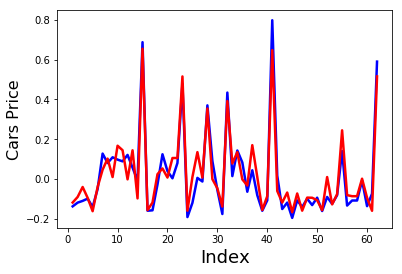

In [13]:
X_test_m4 = sm.add_constant(X_test,has_constant="ass")
y_pred_m4 = lm_4.predict(X_test_m4)
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
# len(y_test)
plt.figure()     # Size of the figure
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m4, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Cars Price', fontsize=16)                       # Y-label

Text(0,0.5,'y_pred')

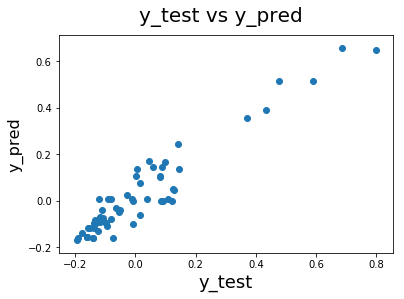

In [14]:
fig = plt.figure()
plt.scatter(y_test,y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label



Text(0,0.5,'ytest-ypred')

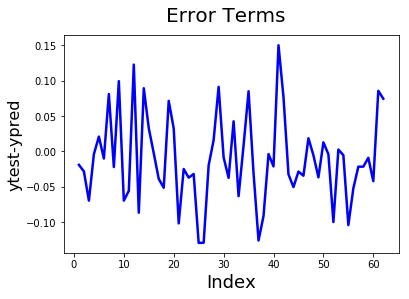

In [15]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c,y_test-y_pred_m4, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

/home/abhi/venvs/notebook/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Index')

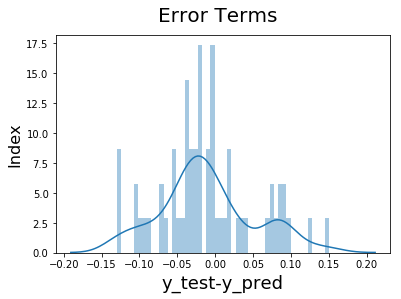

In [16]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m4),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [17]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m4)))

('RMSE :', 0.06286613510423725)


In [18]:
# #

# def nextMove(n,r,c,grid):
#     return ""

# n = int(input())
# r,c = [int(i) for i in input().strip().split()]
# grid = []

# for i in range(0, n):
#     grid.append(input())

# print(nextMove(n,r,c,grid))